<a href="https://colab.research.google.com/github/SimonOuellet/pythonM2-2024/blob/leprof/ds_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# À propos du jeu de données.
- work_year: The year in which the data was recorded. This field
indicates the temporal context of the data, important for understanding salary trends over time.

- job_title: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

- job_category: A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

- salary_currency: The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.

- salary: The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.

- salary_in_usd: The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.

- employee_residence: The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.

- experience_level: Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.

- employment_type: Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.

- work_setting: The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.

- company_location: The country where the company is located. It helps in analyzing how the location of the company affects salary structures.

- company_size: The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.

# Importation des librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model  import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Charger les données depuis un fichier CSV dans un DataFrame Pandas

In [4]:
#df_dsjobs = pd.read_csv('/content/jobs_in_data.csv')
df_dsjobs = pd.read_csv('https://raw.githubusercontent.com/SimonOuellet/pythonM2-2024/leprof/data/jobs_in_data.csv')

In [5]:
df_dsjobs.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


# Validation et nettoyage des données
- Valeurs manquantes
- Doublons
## Vérification des valeurs manquantes

In [45]:
df_dsjobs.isnull().sum()

work_year               0
job_title               0
job_category            0
salary_in_usd           0
employee_residence      0
experience_level        0
employment_type         0
work_setting            0
company_location        0
company_size            0
salary_group          317
dtype: int64

## Vérification de l'existance de doublons

In [44]:
df_dsjobs.duplicated().sum()

0

Oups, y a des doublons!  
Ce sont de "vrais" doublons, est-ce qu'il faut  **les enlever** pour éviter de biaiser le modèle.   
Est-ce que les doublons risqueraient de sur-représenter certaines configurations de données?

In [8]:
#df_dsjobs.drop_duplicates(inplace=True)
#df_dsjobs.duplicated().sum()  # check again the duplicates

0

## Analyses statistiques du tableau de données

In [9]:
df_dsjobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5341 non-null   int64 
 1   job_title           5341 non-null   object
 2   job_category        5341 non-null   object
 3   salary_currency     5341 non-null   object
 4   salary              5341 non-null   int64 
 5   salary_in_usd       5341 non-null   int64 
 6   employee_residence  5341 non-null   object
 7   experience_level    5341 non-null   object
 8   employment_type     5341 non-null   object
 9   work_setting        5341 non-null   object
 10  company_location    5341 non-null   object
 11  company_size        5341 non-null   object
dtypes: int64(3), object(9)
memory usage: 542.4+ KB


In [10]:
df_dsjobs.describe()

,work_year,salary,salary_in_usd
count,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099
std,0.608026,67025.469452,66594.117529
min,2020.000000,14000.000000,15000.000000
25%,2022.000000,97300.000000,98506.000000
50%,2023.000000,140000.000000,140000.000000
75%,2023.000000,186200.000000,186000.000000
max,2023.000000,450000.000000,450000.000000


In [11]:
df_dsjobs.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [12]:
df_dsjobs.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

Les colonnes *salary* et *salary_currency* pourraient générer une fuite d'informations (data leakage) car ils sont colinéaires avec *salary_in_usd* et pourraient biaiser les modèles.  
Il est donc préférable de les supprimer.

In [13]:
df_dsjobs=df_dsjobs.drop(columns=['salary','salary_currency'])

In [14]:
df_dsjobs.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


# EDA Exploratory Data Analysis (L'analyse exploratoire des données).


<Axes: xlabel='salary_in_usd', ylabel='Count'>

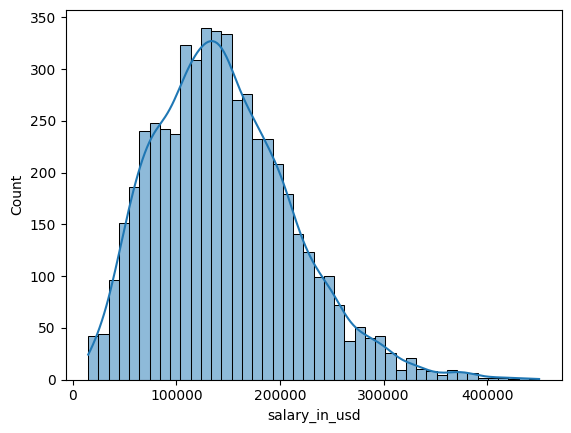

In [15]:
sns.histplot(df_dsjobs.salary_in_usd,kde=True)

In [16]:
salary_range = df_dsjobs['salary_in_usd'].agg(['min', 'max'])
print("Minimum Salary:", salary_range['min'])
print("Maximum Salary:", salary_range['max'])

Minimum Salary: 15000
Maximum Salary: 450000


Top 20 des pays offrant les salaires les plus importants. (mais où est la France?!)

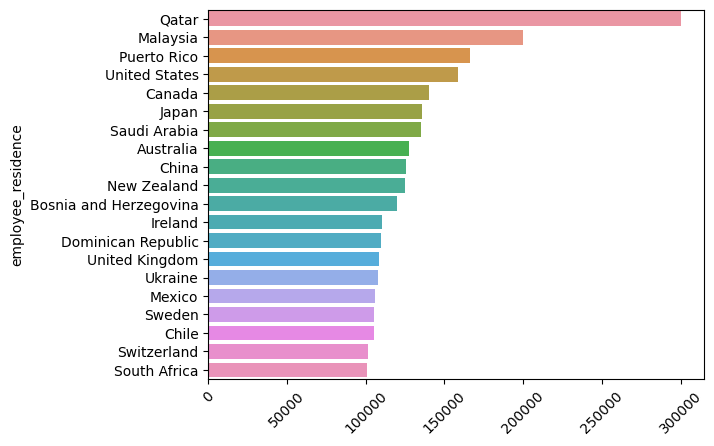

<Figure size 600x1200 with 0 Axes>

In [17]:
area_salary=df_dsjobs.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)
sns.barplot(y=area_salary.nlargest(20).index,x=area_salary.nlargest(20).values)
sns.set_context("notebook")
plt.xticks(rotation =45);
plt.figure(figsize=(2,4), dpi=300)
sns.despine(left=True, bottom=True)

## Catégories ayant les salaires les plus élevés.

<Axes: ylabel='job_category'>

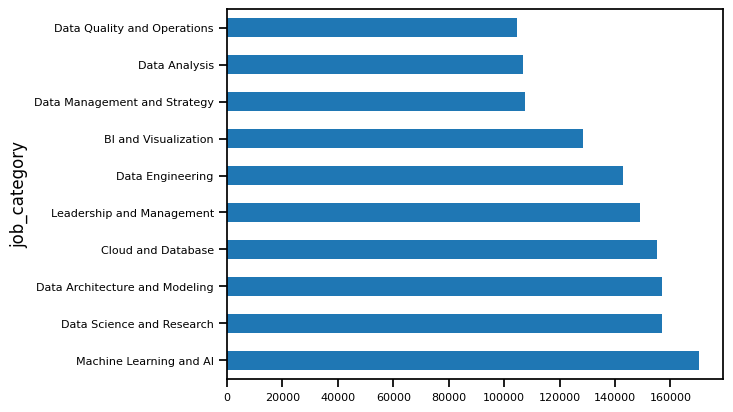

In [18]:
category_salary=df_dsjobs.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False)
category_salary.plot(kind='barh', fontsize=8)

## Postes ayant les salaires les plus élevés.

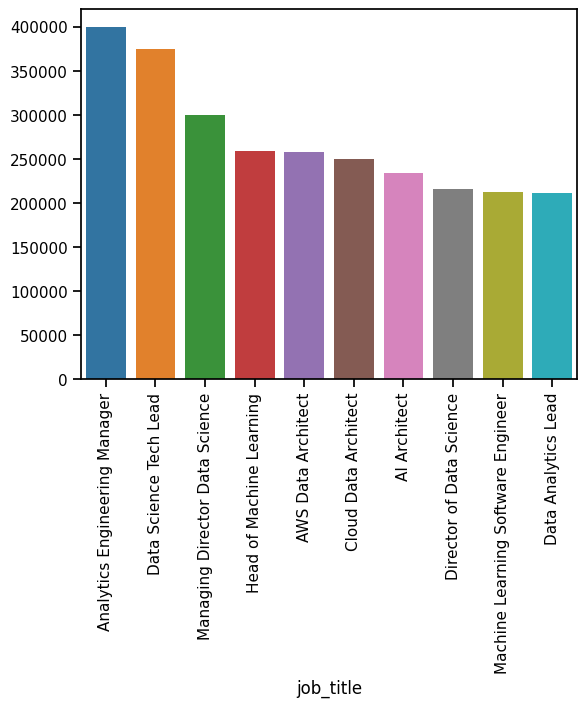

In [19]:
category_salary=df_dsjobs.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
sns.barplot(x=category_salary.nlargest(10).index,y=category_salary.nlargest(10).values)
plt.xticks(rotation=90);

## Évolution du salaire à travers les années

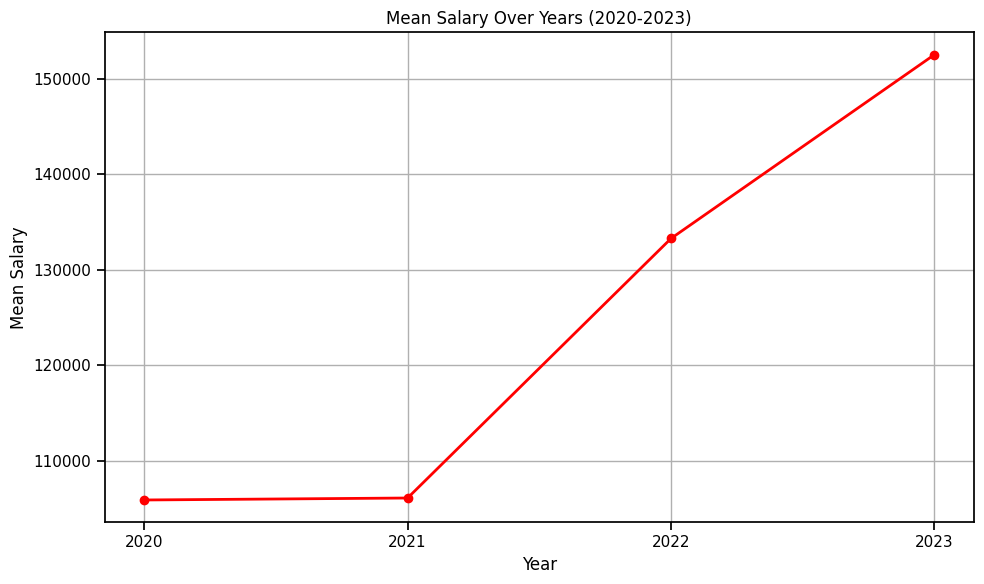

In [20]:
mean_salaries = df_dsjobs.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_salaries.index, mean_salaries.values, marker='o', linestyle='-', color='red', linewidth=2, label='Mean Salary Trend')
plt.title('Mean Salary Over Years (2020-2023)')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Salary', fontsize=12)
plt.grid(True)
plt.xticks(mean_salaries.index)
plt.tight_layout()
plt.show()

## Relations entre le niveau d'expérience et de salaire.

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

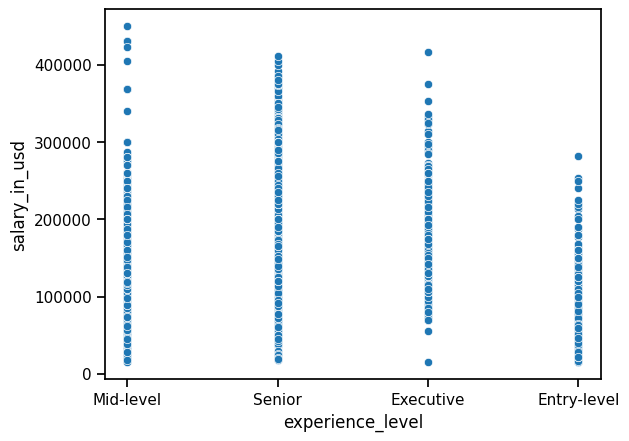

In [21]:
sns.scatterplot(x=df_dsjobs.experience_level,y=df_dsjobs.salary_in_usd)

## Quels types de contrats rémunèrent le mieux

<Axes: ylabel='salary_in_usd'>

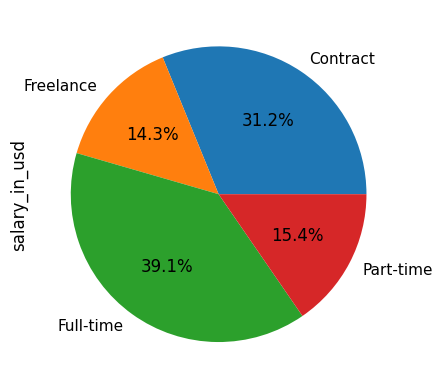

In [22]:
work_type_salary=df_dsjobs.groupby('employment_type')['salary_in_usd'].mean()
work_type_salary.plot(kind='pie',autopct='%1.1f%%')

## Correllations entre variables numériques

In [23]:
df_num=df_dsjobs.select_dtypes(include='number')
df_num.corr()

,work_year,salary_in_usd
work_year,1.000000,0.178031
salary_in_usd,0.178031,1.000000


### Analyse de la répartition des données

Équilibre de la variable Employees residences

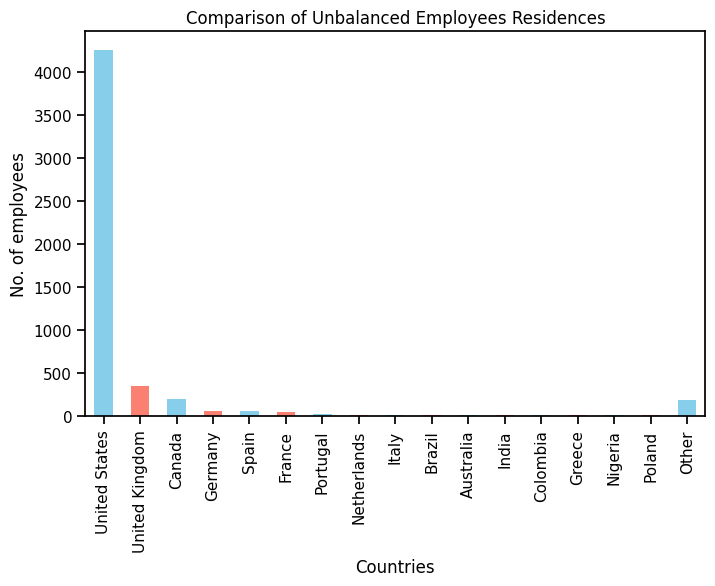

In [24]:
threshold = 10
residences = df_dsjobs['employee_residence'].value_counts()
significant_res = residences[residences > threshold]
other_res = residences[residences < threshold].sum()
significant_res['Other'] = other_res
significant_res

plt.figure(figsize=(8, 5))
significant_res.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Countries')
plt.ylabel('No. of employees')
plt.title('Comparison of Unbalanced Employees Residences')
plt.show()

Équilibre de la variable Experience level

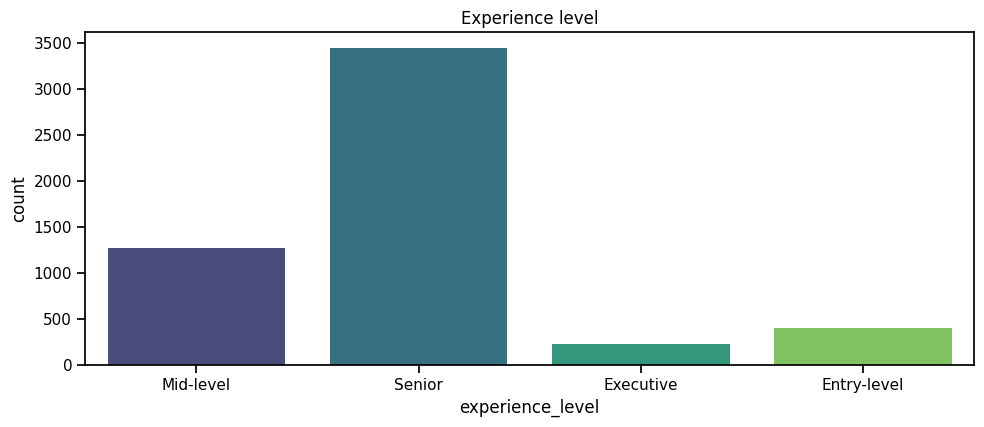

In [25]:
fig = plt.figure(figsize=(10, 16))
plt.subplot(4, 1, 1)
plot = sns.countplot(data=df_dsjobs, x='experience_level', palette='viridis')
plt.title("Experience level")
plt.title("Experience level")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Équilibre de la variable Employment Type

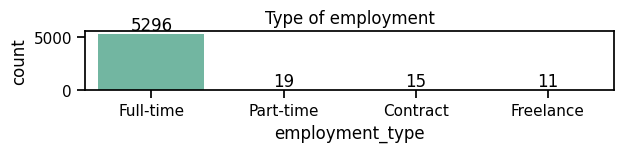

In [26]:
plt.subplot(4, 1, 2)
plot = sns.countplot(data=df_dsjobs, x='employment_type', palette='Set2')
value_counts = df_dsjobs['employment_type'].value_counts()
for i, v in enumerate(value_counts):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.title("Type of employment")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Équilibre de la variable work_setting

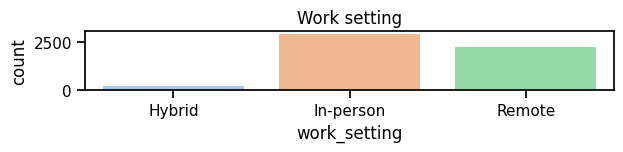

In [27]:
plt.subplot(4, 1, 3)
plot = sns.countplot(data=df_dsjobs, x='work_setting', palette='pastel')
plt.title("Work setting")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Équilibre de la variable company size

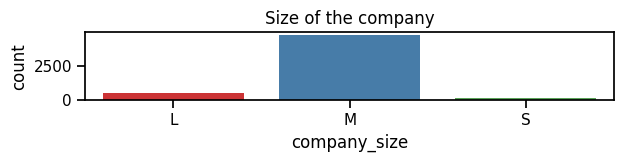

In [28]:
plt.subplot(4, 1, 4)
plot = sns.countplot(data=df_dsjobs, x='company_size', palette='Set1')
plt.title("Size of the company")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

## Création de classes de salaires

In [29]:
df_dsjobs['salary_group'] = np.nan
df_dsjobs.loc[df_dsjobs['salary_in_usd'] < 50000, 'salary_group'] = 'Salary <50000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 50000) & (df_dsjobs['salary_in_usd'] < 100000), 'salary_group'] = 'Salary >50000 and >100000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 100000) & (df_dsjobs['salary_in_usd'] < 150000), 'salary_group'] = 'Salary >100000 and <150000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 150000) & (df_dsjobs['salary_in_usd'] < 200000), 'salary_group'] = 'Salary >150000 and <200000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 200000) & (df_dsjobs['salary_in_usd'] < 250000), 'salary_group'] = 'Salary >200000 and <250000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 250000) & (df_dsjobs['salary_in_usd'] < 300000), 'salary_group'] = 'Salary >250000 and <300000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 300000) & (df_dsjobs['salary_in_usd'] < 350000), 'salary_group'] = 'Salary >300000 and <350000'
df_dsjobs.loc[df_dsjobs['salary_in_usd'] > 350000, 'salary_group'] = 'Salary >350000'

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Salary <50000'),
  Text(1, 0, 'Salary >50000 and >100000'),
  Text(2, 0, 'Salary >100000 and <150000'),
  Text(3, 0, 'Salary >150000 and <200000'),
  Text(4, 0, 'Salary >200000 and <250000'),
  Text(5, 0, 'Salary >250000 and <300000'),
  Text(6, 0, 'Salary >300000 and <350000'),
  Text(7, 0, 'Salary >350000')])

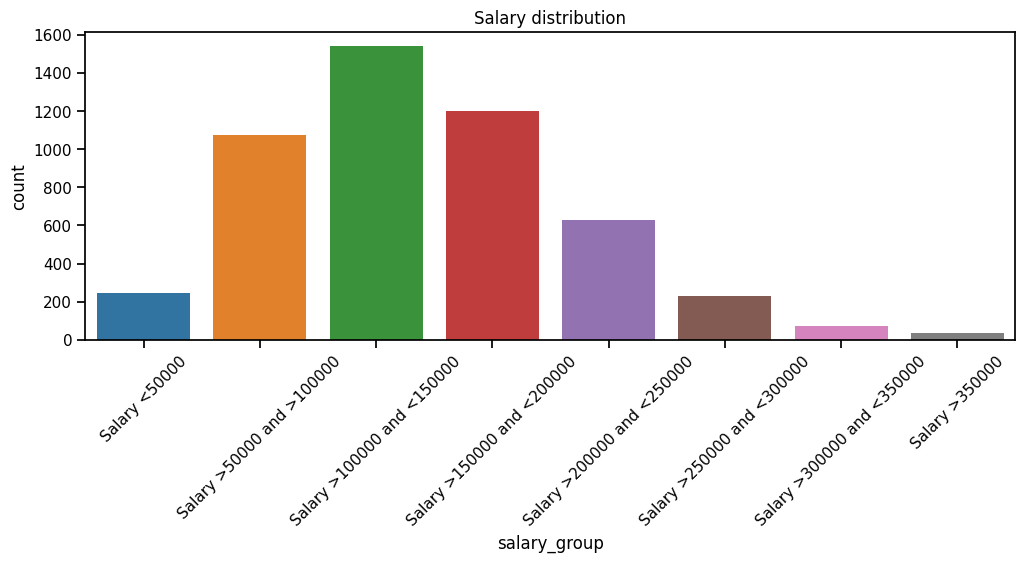

In [30]:
plt.figure(figsize=(12, 4))
g = sns.countplot(data=df_dsjobs, x='salary_group', order=['Salary <50000', 'Salary >50000 and >100000', 'Salary >100000 and <150000', 'Salary >150000 and <200000', 'Salary >200000 and <250000', 'Salary >250000 and <300000', 'Salary >300000 and <350000', 'Salary >350000'])
plt.title('Salary distribution')
plt.xticks(rotation=45)

<Axes: xlabel='salary_in_usd', ylabel='Count'>

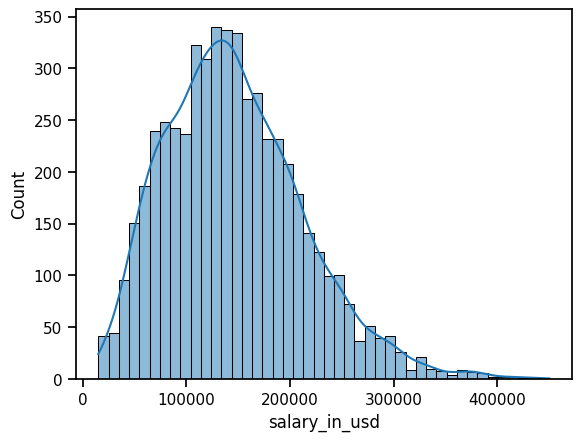

In [31]:
sns.histplot(df_dsjobs.salary_in_usd,kde=True)

## Identification des valeurs abérantes

<Axes: >

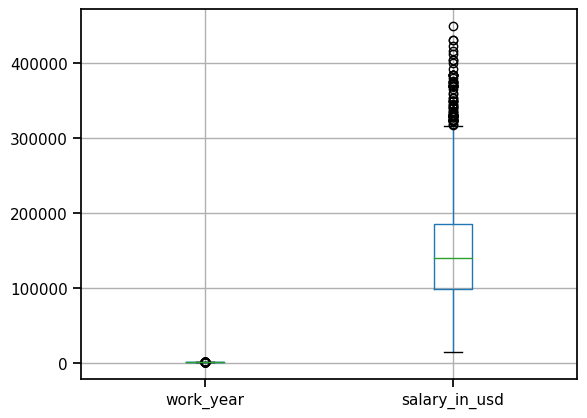

In [32]:
df_dsjobs.boxplot()

# Préparation du jeu de données pour l'apprentissage
## Découpage du jeu de données

In [46]:
X=df_dsjobs.drop(columns=['salary_in_usd','salary_group'],axis=1 )
y=df_dsjobs.salary_in_usd.values

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(4272, 9)
(1069, 9)


In [48]:
X_train.head()

,work_year,job_title,job_category,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
4587,2023,Data Manager,Leadership and Management,United States,Mid-level,Full-time,In-person,United States,M
2813,2023,Analytics Engineer,Leadership and Management,United States,Senior,Full-time,Remote,United States,M
5813,2023,Research Scientist,Data Science and Research,United States,Entry-level,Full-time,Hybrid,United States,L
7854,2022,Data Analyst,Data Analysis,United States,Mid-level,Full-time,In-person,United States,M
3658,2023,Data Scientist,Data Science and Research,United States,Senior,Full-time,In-person,United States,M


## Encodage des variables catégorielles en variables numériques.
[doc OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

In [49]:
ordinal_inco=OrdinalEncoder()
x_train=ordinal_inco.fit_transform(X_train)
x_test=ordinal_inco.fit_transform(X_test)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4272, 9)
(1069, 9)
(4272,)
(1069,)


In [51]:
x_train[0:5]

array([[  3.,  48.,   8.,  74.,   2.,   2.,   1.,  64.,   1.],
       [  3.,   7.,   8.,  74.,   3.,   2.,   2.,  64.,   1.],
       [  3., 112.,   7.,  74.,   0.,   2.,   0.,  64.,   0.],
       [  2.,  32.,   2.,  74.,   2.,   2.,   1.,  64.,   1.],
       [  3.,  66.,   7.,  74.,   3.,   2.,   1.,  64.,   1.]])

## Sélection de variables
### Évaluation de [l'indépendance](https://fr.wikipedia.org/wiki/Ind%C3%A9pendance_(probabilit%C3%A9s)) des variables.  
0 = totalement indépendantes   
1 = très fortement liées

In [52]:
feature_names=[]
importance_values=[]
columns=ordinal_inco.get_feature_names_out()
impo_features=mutual_info_regression(x_train,y_train)
for feature,importance in zip(columns, impo_features):
   feature_names.append(feature)
   importance_values.append(importance)

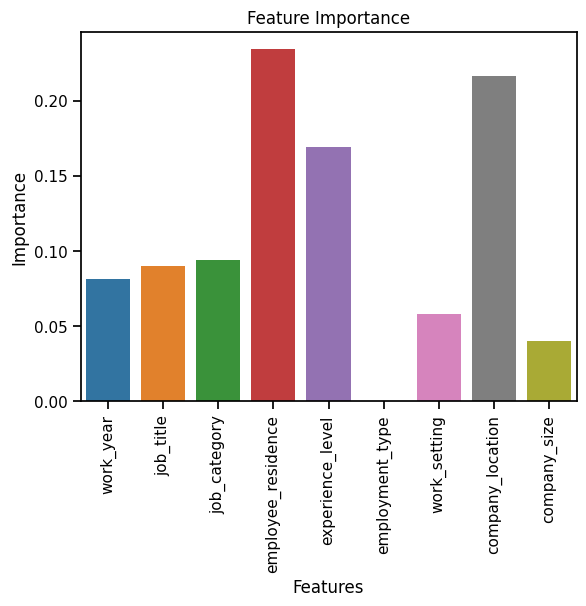

In [54]:
sns.barplot(x=feature_names,y=importance_values)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90);



## Transformation des variables catégorielles qualitatives en variables numériques.
[Pandas get_dummies doc](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)


In [55]:
cat_columns = df_dsjobs.select_dtypes(include='object').columns.tolist()
cat_columns

['job_title',
 'job_category',
 'employee_residence',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_location',
 'company_size',
 'salary_group']

In [57]:
df_dsjobs_dummies_matrice_creuse = pd.get_dummies(df_dsjobs, columns=cat_columns)
df_dsjobs_dummies_matrice_creuse

,work_year,salary_in_usd,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,job_title_Analytics Engineer,...,company_size_M,company_size_S,salary_group_Salary <50000,salary_group_Salary >100000 and <150000,salary_group_Salary >150000 and <200000,salary_group_Salary >200000 and <250000,salary_group_Salary >250000 and <300000,salary_group_Salary >300000 and <350000,salary_group_Salary >350000,salary_group_Salary >50000 and >100000
0,2023,95012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2023,186000,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2023,81800,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2023,212000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2023,93300,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,165000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9351,2020,412000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9352,2021,151000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9353,2020,105000,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


### Les matrices creuses (Sparce Array)

In [58]:
df_dsjobs_dummies = pd.get_dummies(df_dsjobs, columns=cat_columns, sparse=True )


In [59]:
df_dsjobs_dummies_matrice_creuse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 9354
Columns: 312 entries, work_year to salary_group_Salary >50000 and >100000
dtypes: int64(2), uint8(310)
memory usage: 1.7 MB


In [60]:
df_dsjobs_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 9354
Columns: 312 entries, work_year to salary_group_Salary >50000 and >100000
dtypes: Sparse[uint8, 0](310), int64(2)
memory usage: 358.3 KB


In [62]:
X=df_dsjobs_dummies.drop(columns='salary_in_usd',axis=1 )
y=df_dsjobs_dummies.salary_in_usd.values

In [63]:
X_train_dum,X_test_dum,y_train_dum,y_test_dum=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train_dum.shape)
print(X_test_dum.shape)

(4272, 311)
(1069, 311)


## Évaluation de l'importance des variables à l'aide d'un Random Forest

In [64]:
rf=RandomForestRegressor()
rf.fit(X_train_dum,y_train_dum)
importance=rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_dum.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df.round(3))

                                     Feature  Importance
310   salary_group_Salary >50000 and >100000       0.293
304  salary_group_Salary >100000 and <150000       0.220
303               salary_group_Salary <50000       0.183
305  salary_group_Salary >150000 and <200000       0.062
309              salary_group_Salary >350000       0.048
..                                       ...         ...
9    job_title_Analytics Engineering Manager       0.000
271                   company_location_Malta       0.000
272               company_location_Mauritius       0.000
107        job_title_Manager Data Management       0.000
155                employee_residence_Cyprus       0.000

[311 rows x 2 columns]


## Création de modèles à l'aide de différents algorithmes de ML.

In [65]:
models={
    'dt':DecisionTreeRegressor(),
    'lr':LinearRegression(),
    'rf':RandomForestRegressor(),
    'svr':SVR()
}

### Entrainement et évéluation de la performance des modèles.  
[RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation).  
 Best = 0.  
[R2](https://fr.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination) Best = 1, worse = 0 or negative.

In [66]:
for name, model in models.items():
    model.fit(X_train_dum, y_train_dum)
    y_pred = model.predict(X_test_dum)
    mse= mean_squared_error(y_pred, y_test)
    RMSE = np.sqrt(mse)
    r2=r2_score(y_pred,y_test)
    print(name, RMSE , r2)

dt 24616.91670660257 0.8482615301134006
lr 949499314337946.0 -0.0008643249047803891
rf 21380.737195031674 0.8830830863398504
svr 65173.166818985286 -9770868993502028.0


## Entrainement d'un XGBoost pour comparer

In [86]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest=xgb.DMatrix(x_test, label=y_test)
params = {
    'objective': 'reg:squarederror',  # Use 'reg:squarederror' for regression
    'eval_metric': 'rmse'  # Root Mean Squared Error as evaluation metric
}

model = xgb.train(params, dtrain)

# Make predictions on the training data
y_pred = model.predict(dtest)
mse=mean_squared_error(y_pred,y_test)
RMSE=np.sqrt(mse)
r2=r2_score(y_pred,y_test)

print(RMSE)
print(r2)

0.9656271103039904
0.842165580557924


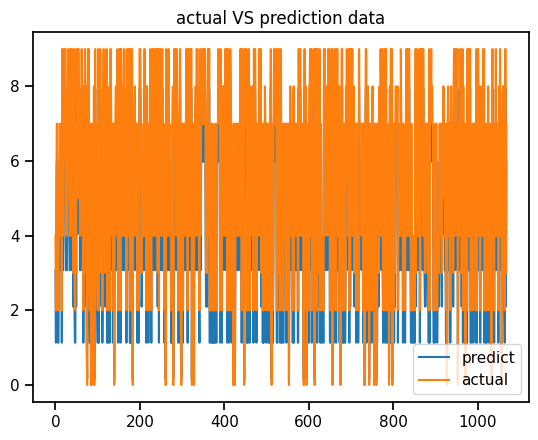

In [87]:
plt.plot(y_pred,label='predict')
plt.plot(y_test,label='actual')
plt.title('actual VS prediction data')
plt.legend()


# Version 2 : On change la cible : de salary_in_usd on plutôt essayer de trouver job_category.

## Identifier et supprimer les variables déséquilibrées.

In [88]:
threshold = 0.85
f_list = []
columns = ['work_year', 'job_title', 'job_category', 'salary_in_usd',
           'employee_residence', 'experience_level', 'employment_type',
           'work_setting', 'company_location', 'company_size']
dataframe = df_dsjobs[columns]

for feature in dataframe.columns:
    value_counts = dataframe[feature].value_counts(normalize=True)  # Calculating percentages
    first_value = value_counts.iloc[0]
    print(feature, ": ", first_value)
    if first_value > threshold:
        f_list.append(feature)

work_year :  0.745178805467141
job_title :  0.20595394120951133
job_category :  0.30986706609249204
salary_in_usd :  0.015914622729825877
employee_residence :  0.7966672907695188
experience_level :  0.6448230668414154
employment_type :  0.9915746114959746
work_setting :  0.545403482493915
company_location :  0.8052799101291893
company_size :  0.8777382512638082


In [89]:
prep_df = dataframe.drop(f_list, axis=1)
prep_df.nunique()

work_year                4
job_title              125
job_category            10
salary_in_usd         1786
employee_residence      83
experience_level         4
work_setting             3
company_location        70
dtype: int64

## Encodage et Normalisation
Finalement peu de variables ont une cardinalité importante.

In [90]:
cat_columns = ['work_year', 'job_title', 'experience_level', 'work_setting']
num_columns = ['salary_in_usd']

Utilisation de pipeline pour enchaîner les traitements.

In [91]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), #Added although no null values
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), #Same here
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])


full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns)
])

Enlève les réponses du jeux de données (X) et on créer un jeu de réponse (y) puis on y applique le pipline de transformations.

In [92]:
X = prep_df.drop('job_category', axis=1)
y = prep_df['job_category'].copy()

On applique le pipline de transformation au jeu de données (X).

In [74]:
X

,work_year,job_title,salary_in_usd,employee_residence,experience_level,work_setting,company_location
0,2023,Data DevOps Engineer,95012,Germany,Mid-level,Hybrid,Germany
1,2023,Data Architect,186000,United States,Senior,In-person,United States
2,2023,Data Architect,81800,United States,Senior,In-person,United States
3,2023,Data Scientist,212000,United States,Senior,In-person,United States
4,2023,Data Scientist,93300,United States,Senior,In-person,United States
...,...,...,...,...,...,...,...
9350,2021,Data Specialist,165000,United States,Senior,Remote,United States
9351,2020,Data Scientist,412000,United States,Senior,Remote,United States
9352,2021,Principal Data Scientist,151000,United States,Mid-level,Remote,United States
9353,2020,Data Scientist,105000,United States,Entry-level,Remote,United States


In [75]:
preproc_dataset = full_pipeline.fit_transform(X)

In [141]:
preproc_dataset.toarray()[:,1:]

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

On encode notre jeu de réponse.

In [77]:
y

0                     Data Engineering
1       Data Architecture and Modeling
2       Data Architecture and Modeling
3            Data Science and Research
4            Data Science and Research
                     ...              
9350      Data Management and Strategy
9351         Data Science and Research
9352         Data Science and Research
9353         Data Science and Research
9354                     Data Analysis
Name: job_category, Length: 5341, dtype: object

In [78]:
label = LabelEncoder()
y = label.fit_transform(y)

In [79]:
y

array([4, 3, 3, ..., 7, 7, 2])

On découpe le jeu de données en jeux d'entrainement et de tests.  
Notez bien la procédure de pipeline pour éviter le dataleakage.  

In [80]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(preproc_dataset.toarray(), y, test_size=0.2, random_state=42)

## Tests des classifiers de bases pour ne retenir que le meilleur.

In [81]:
# List of classifiers
MLA = [

    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),

    # GLM
    #linear_model.LogisticRegressionCV(),
    #linear_model.PassiveAggressiveClassifier(),
    #linear_model.RidgeClassifierCV(),
    #linear_model.SGDClassifier(),
    #linear_model.Perceptron(),

    # Navies Bayes
    #naive_bayes.BernoulliNB(),
    #naive_bayes.GaussianNB(),

    # Nearest Neighbor
    #neighbors.KNeighborsClassifier(),

    # SVM
    #svm.SVC(probability=True),
    #svm.LinearSVC(),

    # Trees
    #tree.DecisionTreeClassifier(),
    #tree.ExtraTreeClassifier(),

    # Discriminant Analysis
    #LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis(),

    # xgboost
    #XGBClassifier()
]

# Create an empty list to store results
results = []

for classifier in MLA:
    model = classifier
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    train_time = round(end_time - start_time, 4)
    y_pred = model.predict(X_test)
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    results.append((classifier.__class__.__name__, acc, train_time))


results_df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy', 'Training Time'])
sorted_results = results_df.sort_values(by='Accuracy', ascending=False)

print(sorted_results)

                    Algorithm  Accuracy  Training Time
3  GradientBoostingClassifier     99.35        16.0029
2        ExtraTreesClassifier     98.69         0.6479
1           BaggingClassifier     98.13         0.1943
4      RandomForestClassifier     98.04         0.5734
0          AdaBoostClassifier     83.54         0.5302


Le meilleur score a été réalisé par le GradientBoostingClassifier.  
À l'aide de ce dernier, il faut trouver les meilleurs hyper-paramètres à l'aide d'un GridSearch.

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

gbc = GradientBoostingClassifier()

grid_param = {
    'loss': ['log_loss'],#['log_loss', 'exponential']
    'learning_rate': [.05], #[.01, .03, .05, .1, .25]
    'n_estimators': [300], #[10, 50, 100, 300]
    'max_depth': [2], #[2, 4, 6, 8, 10, None]
    'random_state': [42]
} #commented the other values to reduce runtime

best_search = GridSearchCV(gbc, grid_param, cv=5, scoring='accuracy')

best_search.fit(X_train, y_train)

best_gbc = best_search.best_estimator_
y_pred = best_gbc.predict(X_test)
acc_best_gbc = round(accuracy_score(y_pred, y_test) * 100, 2)

# Print the best parameters and accuracy
print("Best Parameters:", best_search.best_params_)
print("Accuracy of Best Model:", acc_best_gbc)

Best Parameters: {'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 2, 'n_estimators': 300, 'random_state': 42}
Accuracy of Best Model: 99.35


Matrice de confusion pour vérifier la performance de notre modèle

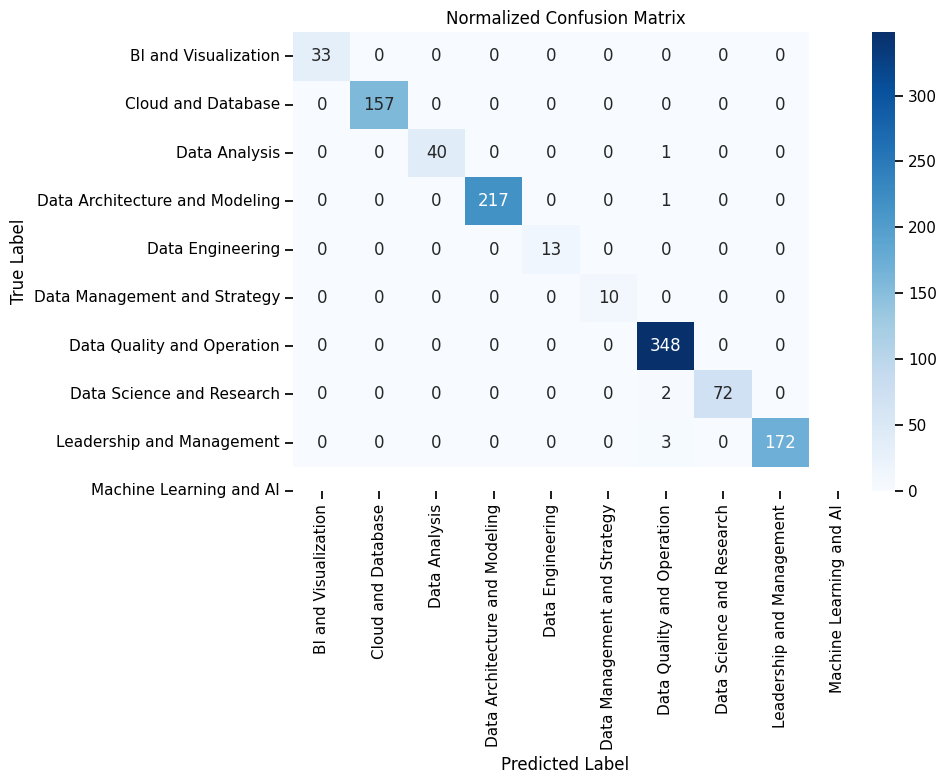

In [83]:
cm = confusion_matrix(y_test, y_pred)
labels = ['BI and Visualization', 'Cloud and Database', 'Data Analysis', 'Data Architecture and Modeling', 'Data Engineering', 'Data Management and Strategy', 'Data Quality and Operation', 'Data Science and Research', 'Leadership and Management', 'Machine Learning and AI']

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Exploration :: WORK ON GOING

## TSNE

In [133]:
df_dsjobs

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_group
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,Salary >50000 and >100000
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M,Salary >150000 and <200000
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M,Salary >50000 and >100000
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M,Salary >200000 and <250000
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M,Salary >50000 and >100000
...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,165000,United States,Senior,Full-time,Remote,United States,L,Salary >150000 and <200000
9351,2020,Data Scientist,Data Science and Research,412000,United States,Senior,Full-time,Remote,United States,L,Salary >350000
9352,2021,Principal Data Scientist,Data Science and Research,151000,United States,Mid-level,Full-time,Remote,United States,L,Salary >150000 and <200000
9353,2020,Data Scientist,Data Science and Research,105000,United States,Entry-level,Full-time,Remote,United States,S,Salary >100000 and <150000


In [84]:
from sklearn.manifold import TSNE

In [179]:
X_embedded = TSNE(n_components=2, learning_rate='auto', n_iter=1000, perplexity=128, n_jobs=-1).fit_transform(preproc_dataset.toarray()[:,1:])

In [181]:
np.savetxt("tsne_jobs.csv", X_embedded, delimiter=",")

In [ ]:
#X_embedded_loaded = np.loadtxt(open('tsne_jobs.csv',"rb"), delimiter=",", skiprows=0)

In [157]:
df_dsjobs.columns

Index(['work_year', 'job_title', 'job_category', 'salary_in_usd',
       'employee_residence', 'experience_level', 'employment_type',
       'work_setting', 'company_location', 'company_size', 'salary_group'],
      dtype='object')

In [155]:
df_dsjobs['company_location'].nunique(dropna=True)

70

In [163]:
X_embedded.shape

(5341, 2)

In [164]:
df_dsjobs.shape

(5341, 11)

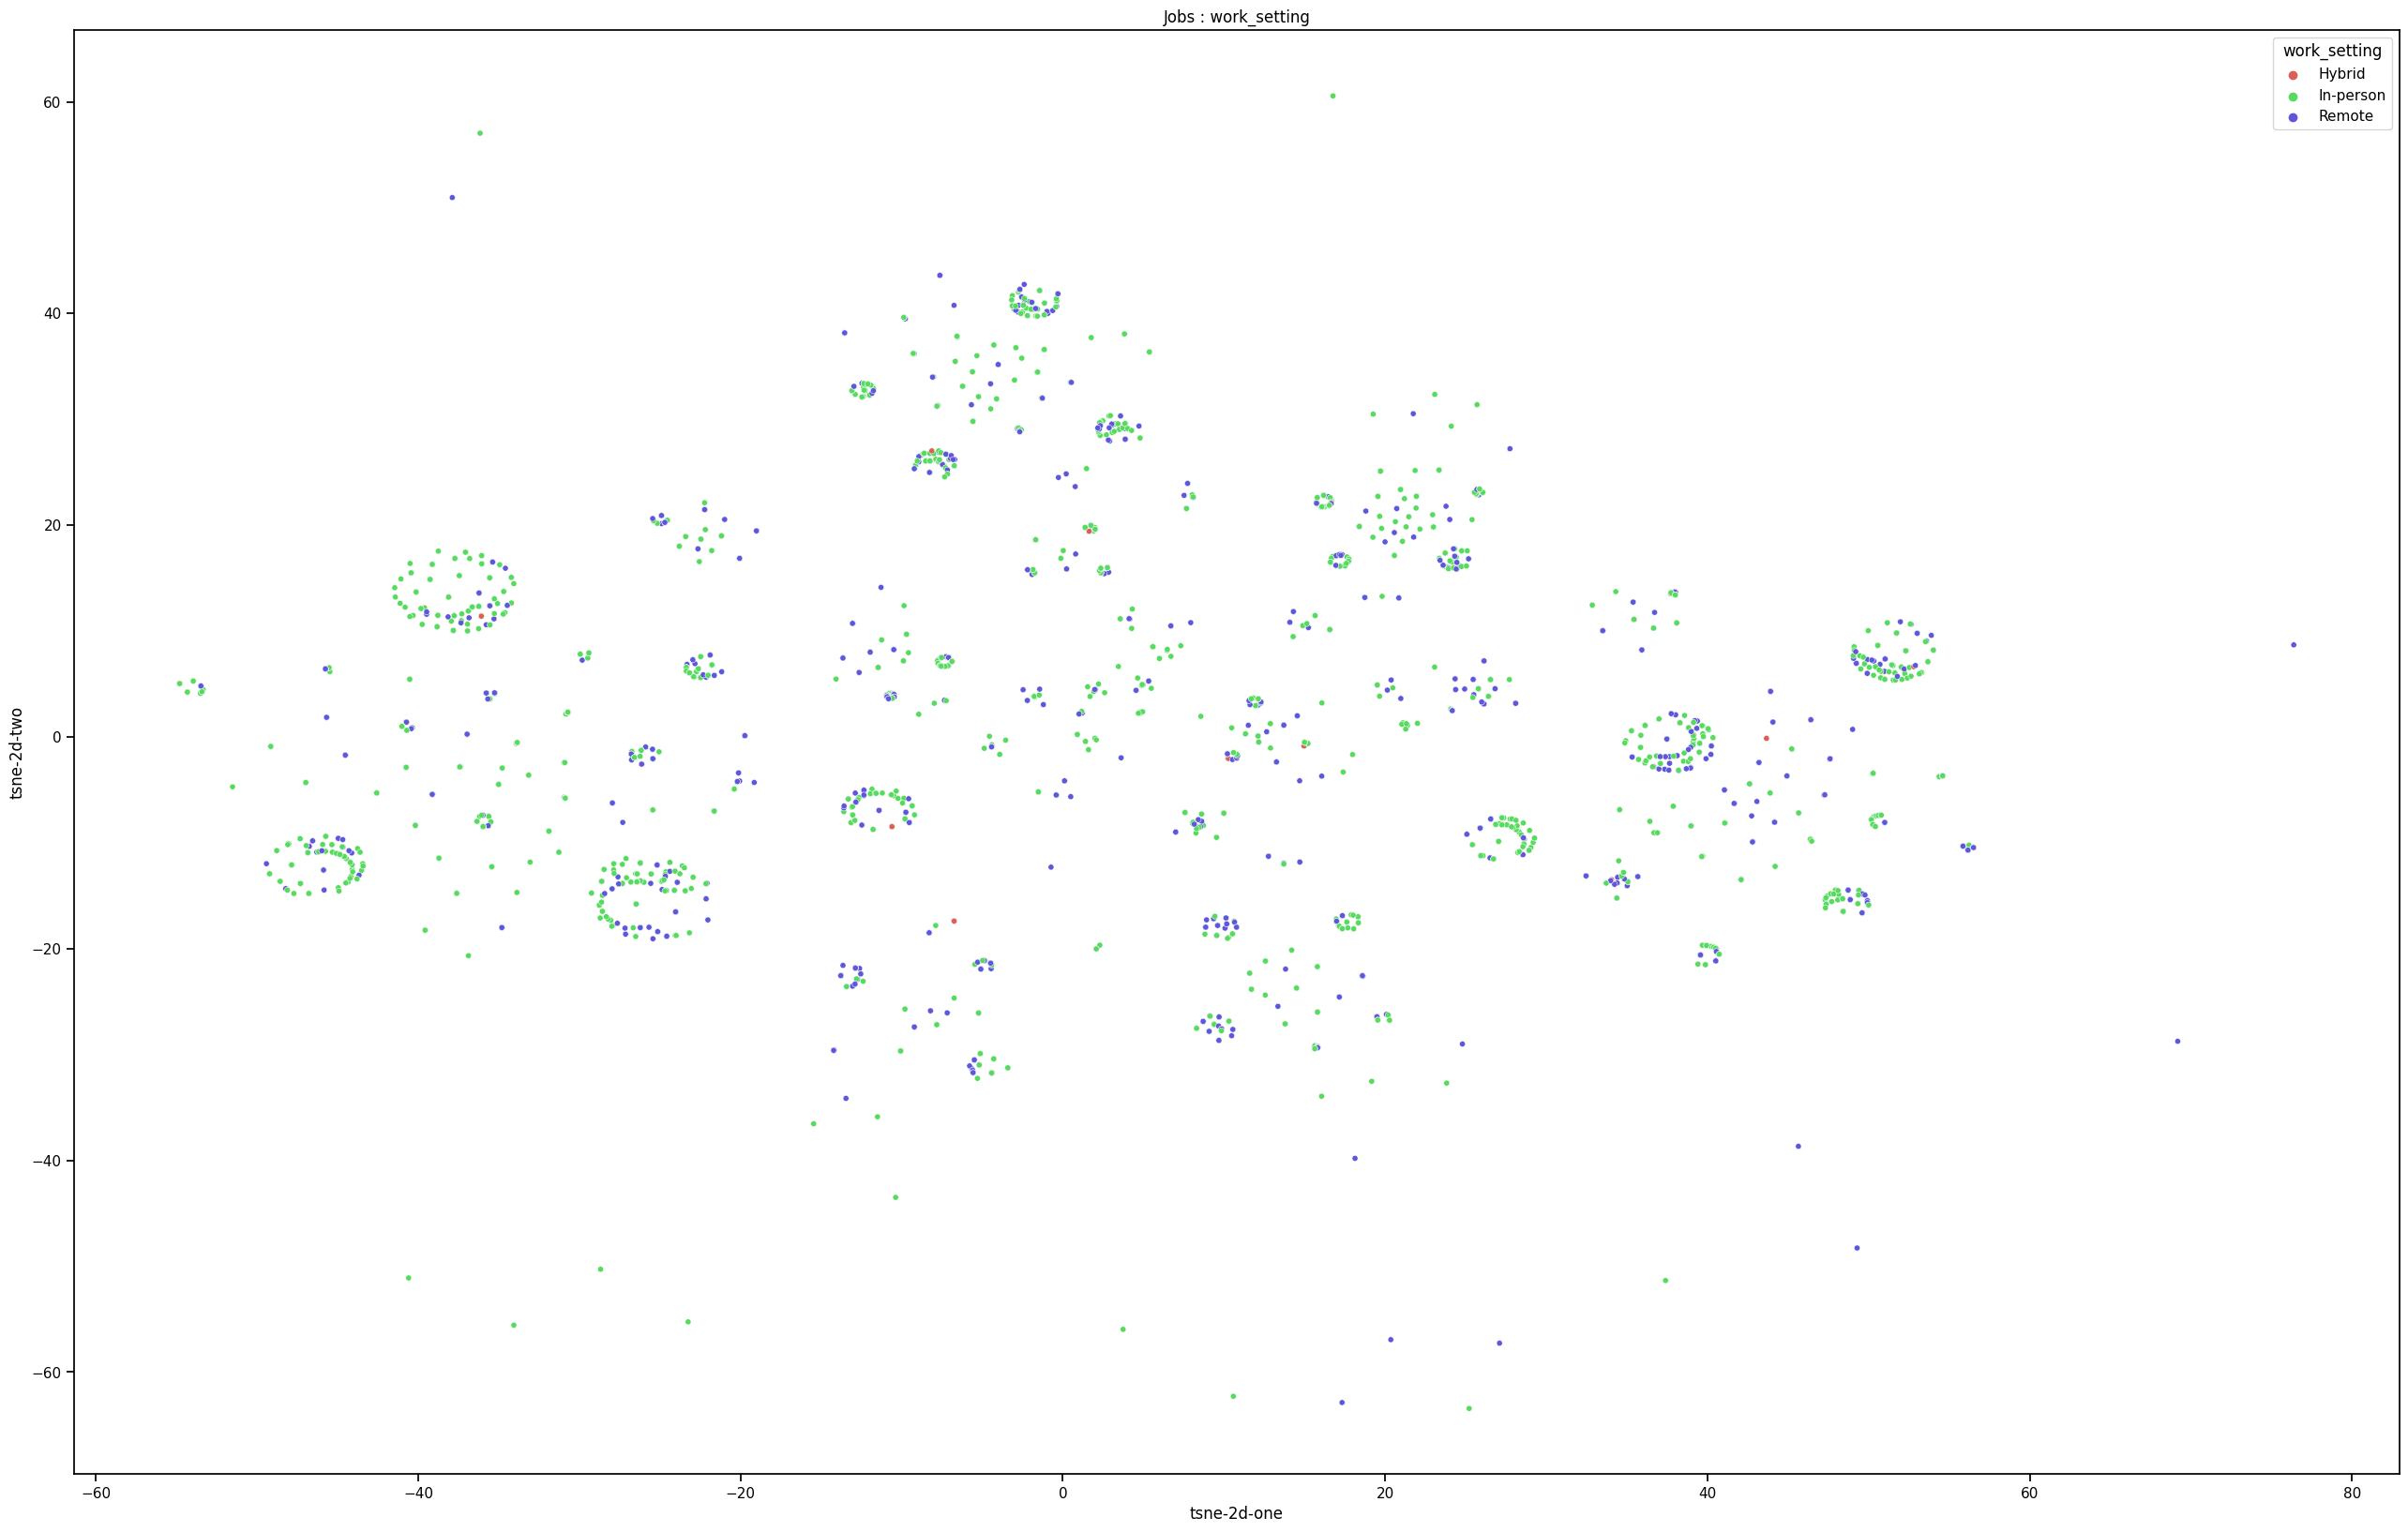

In [180]:
# my_colors = ['#fffffd00','#fffffe00','#ffffff00','#fffffc00','#990000','#992222']
f=pd.DataFrame()
f['tsne-2d-one'] = X_embedded[:,0]
f['tsne-2d-two'] = X_embedded[:,1]
f['work_setting'] = df_dsjobs['work_setting']
plt.figure(figsize=(32,20))
s = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="work_setting",
    palette=sns.color_palette("hls", n_colors=df_dsjobs['work_setting'].nunique(dropna=True)),
    data=f,
    s=20,
    legend="full",
    alpha=1,
    edgecolors='none',
)
s.set_title("Jobs : work_setting")
plt.savefig("jobs.png")